In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
df=pd.read_csv('loan_train.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(480, 13)

# 1. OUTLIER DETECTION

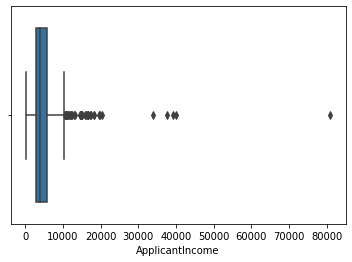

In [8]:
#Boxplot to check outliers in income of the applicant
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

In [9]:
# calculating IQR and upper limit and lower limit to find outliers
Q1 = df.ApplicantIncome.quantile(0.25)
Q3 = df.ApplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [10]:
#Checking the outliers
df[(df.ApplicantIncome < lowerlimit)  | (df.ApplicantIncome > upperlimit)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
138,LP001492,Male,No,0,Graduate,No,14999,0.0,242.0,360.0,0.0,Semiurban,N
144,LP001508,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban,Y


In [11]:
# Droping the rows containing height beyond lower and upper limit.
df1 = df[(df.ApplicantIncome > lowerlimit) & (df.ApplicantIncome < upperlimit)]
df1.shape

(440, 13)

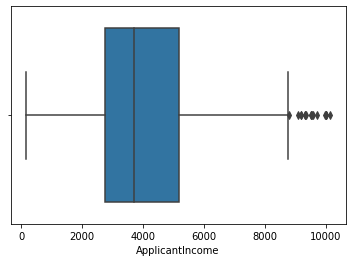

In [12]:
sns.boxplot(x=df1['ApplicantIncome'])
plt.show()

# 2.TRANSFORMATION

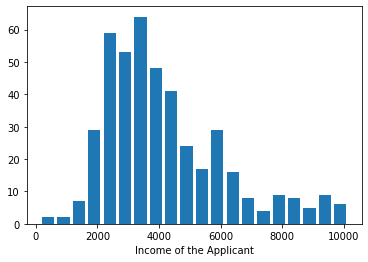

In [13]:
#Distribution before transformation
plt.hist(df1.ApplicantIncome,bins=20, rwidth=0.8)
plt.xlabel("Income of the Applicant")
plt.show()


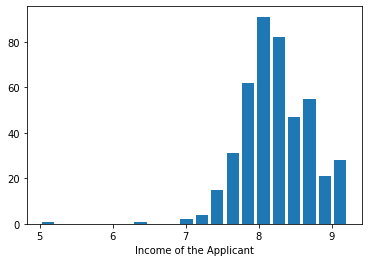

In [14]:
#Log Transformation
x = np.log(df1['ApplicantIncome'])
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Income of the Applicant")
plt.show()


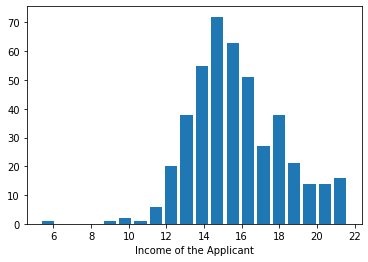

In [15]:
#Cuberoot Transformation
x = np.cbrt(df1.ApplicantIncome)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Income of the Applicant")
plt.show()

# 3. Feature Scaling

In [16]:
#MinMax Scaler
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
numeric_columns = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
numericdf = df1[numeric_columns]
#Dataframe before scaling
numericdf

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,128.0,360.0,1.0
2,3000,66.0,360.0,1.0
3,2583,120.0,360.0,1.0
4,6000,141.0,360.0,1.0
5,5417,267.0,360.0,1.0
...,...,...,...,...
609,2900,71.0,360.0,1.0
610,4106,40.0,180.0,1.0
611,8072,253.0,360.0,1.0
612,7583,187.0,360.0,1.0


In [18]:
numericdf.isna().sum()

ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [20]:
#dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.443788,0.244856,0.72973,1.0
1,0.285314,0.117284,0.72973,1.0
2,0.243568,0.228395,0.72973,1.0
3,0.585644,0.271605,0.72973,1.0
4,0.527280,0.530864,0.72973,1.0


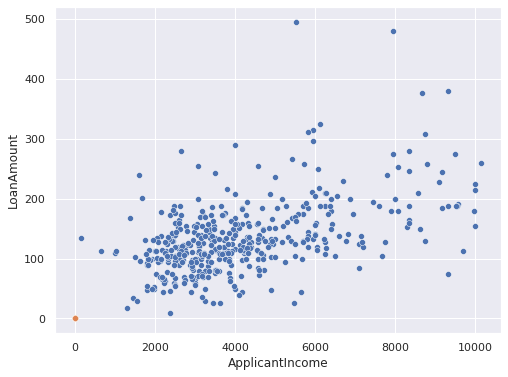

In [21]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=df1,x='ApplicantIncome',y='LoanAmount')
sns.scatterplot(data = transformdf,x='ApplicantIncome',y='LoanAmount')
plt.show()

In [22]:
#ROBUST SCALER
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(numericdf)

In [23]:
robustdf = pd.DataFrame(numeric,columns=numeric_columns)
robustdf.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.372850,0.050000,0.0,0.0
1,-0.283316,-0.983333,0.0,0.0
2,-0.456166,-0.083333,0.0,0.0
3,0.960207,0.266667,0.0,0.0
4,0.718549,2.366667,0.0,0.0


# 4. Encoding Categorical variables

In [24]:
#One-Hot Encoding using Pandas get_dummies()
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [25]:
df1.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [26]:
categorical_columns=["Gender",'Married']
cdf = df1[categorical_columns]
cdf.head()

,Gender,Married
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
5,Male,Yes


In [27]:
#creating dummy variables for nominal categorical variable using get_dummies()
categorical_columns=["Gender",'Married']
cdf = df1[categorical_columns]
dummies_df = pd.get_dummies(cdf)
dummies_df.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,1,0
5,0,1,0,1


In [28]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
df1['Loan_Status'] = le.fit_transform(df1.Loan_Status)
df1.head()

/tmp/ipykernel_5410/1738677619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Loan_Status'] = le.fit_transform(df1.Loan_Status)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


# 5. Feature Selection

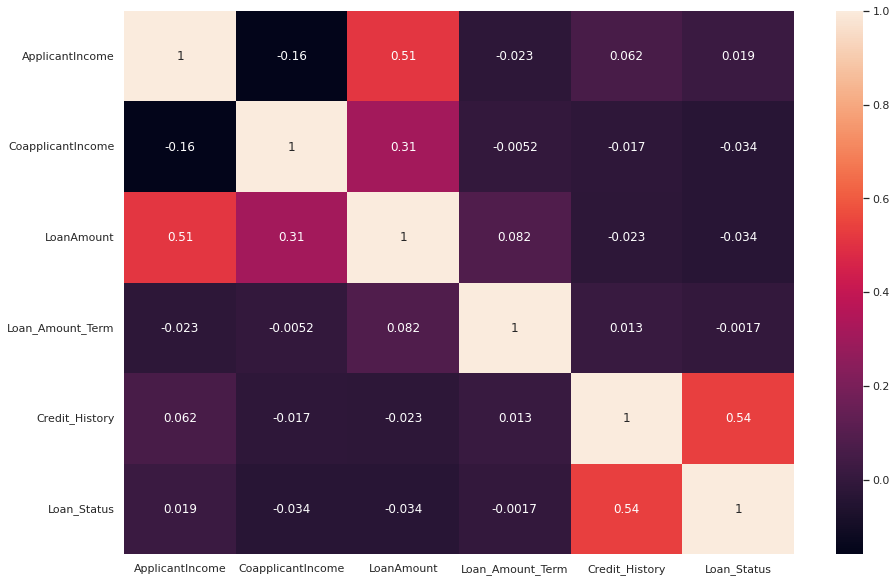

In [38]:
corr = df1.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [39]:
corr.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [40]:
def correlation_matrix(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [41]:
corr_features = correlation_matrix(df1, 0.7)
corr_features

set()

In [52]:
newdf = transformdf.drop(corr_features,axis = 1)
newdf.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.443788,0.244856,0.72973,1.0
1,0.285314,0.117284,0.72973,1.0
2,0.243568,0.228395,0.72973,1.0
3,0.585644,0.271605,0.72973,1.0
4,0.527280,0.530864,0.72973,1.0


# Training the model

In [53]:
y=df1.Loan_Status
x=newdf

In [54]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtrain, ytrain)

0.21952709149987182

In [56]:
model.score(xtest, ytest)

0.5379476618307131